**Supress warnings**

In [0]:
import warnings
warnings.filterwarnings('ignore')

**Import necessary libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

pd.set_option('display.max_columns',122)
pd.set_option('display.max_rows',100)

# **Task 1.** Import the dataframe

**Step 1**: Provide authentication to Colab to read through the Google Drive.
Open the provided URL once the cell is executed and provide authentication.
Copy the generated code and paste in the textbox provided below the URL.

In [0]:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Step 2**: Run the cell inorder to print the id

In [6]:
link1 = 'https://drive.google.com/open?id=1B8B6BK9T47e14BW8EWVXaRww1hdxoveZ'
fluff, id = link1.split('=')
print (id)

1B8B6BK9T47e14BW8EWVXaRww1hdxoveZ


**Step 3** : Read the dataframe

In [7]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('application_data.csv')  
application_data = pd.read_csv('application_data.csv')
print("Read successful... ")

Reading successful... 


# Task 2. Normal routine check commands

In [0]:
# printing the basic details

print("Shape of the dataframe:",application_data.shape)

Shape of the dataframe: (307511, 122)


In [0]:
# Printing the info

print("Information of the dataframe:",application_data.info)

Information of the dataframe: <bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_

In [0]:
# printing the list columns

application_data.columns

In [0]:
# printing the data types of all the columns

application_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [0]:
# printing a sample of 10 records

application_data.head(10)

,INCOME_CATEGORY


# Task 3. Data Quality Check and missing values

#### **Task 3.1**. Find the percentage of missing values for all the columns

In [0]:
# Find the %ge of missing values plus the number of missing values in each column

missing_values = pd.DataFrame(application_data.isnull().sum(axis=0)[application_data.isnull().sum(axis=0)>0], columns=['Missing Values'])
missing_values['Missing percent'] = missing_values['Missing Values'].apply(lambda x: round((100  * x/len(application_data['SK_ID_CURR'])), 5))
missing_values

,Missing Values,Missing percent
AMT_ANNUITY,12,0.00390
AMT_GOODS_PRICE,278,0.09040
NAME_TYPE_SUITE,1292,0.42015
OWN_CAR_AGE,202929,65.99081
OCCUPATION_TYPE,96391,31.34555
CNT_FAM_MEMBERS,2,0.00065
EXT_SOURCE_1,173378,56.38107
EXT_SOURCE_2,660,0.21463
EXT_SOURCE_3,60965,19.82531
APARTMENTS_AVG,156061,50.74973


#### **Task 3.2.** Remove columns with high missing percentage

In [0]:
# Columns with missing values more than 50%

missing_values[ missing_values['Missing percent'] > 50 ].index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

There are a total of 41 columns with missing values more than 50%.

In [0]:
# Removing all these data since they have missing value %ge greater 50%

application_data = application_data[application_data.columns[application_data.isnull().mean() < 0.5]]
application_data.shape

(307511, 81)

##### Shape of the dataframe after dropping 41 columns = (307511, 81)

##### **Task 3.3**. For columns which has less percentage(around 13% or so), you need to check ......

In [0]:
# finding the unique content of these columns to check if they're numerical or categorical

application_data.nunique().sort_values()


FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

In [0]:
# Fetching columns with missing %ge lesser than 13%

missing_values[missing_values['Missing percent'] <= 13.00000 ]

,Missing Values,Missing percent
AMT_ANNUITY,12,0.00390
AMT_GOODS_PRICE,278,0.09040
NAME_TYPE_SUITE,1292,0.42015
CNT_FAM_MEMBERS,2,0.00065
EXT_SOURCE_2,660,0.21463
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33202
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33202
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.33202
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.33202
DAYS_LAST_PHONE_CHANGE,1,0.00033


## Approach to impute data from the above columns-


1.    **'DAYS_LAST_PHONE_CHANGE'**: There's just 1 missing value. We wont impute this record and simply ignore it.

2. **'CNT_FAM_MEMBERS'**:  There are two missing values in this column. By finding the mean and median using describe(), we get values 2.152665 and 2 respectively. Since Family members cant be in decimals we shall choose median to impute these records.

3. **'AMT_ANNUITY'**:  There're only 12 missing values in this column.. We shall impute this using the median() value since the mean() method of imputation is susceptible to outliers.

4. **'AMT_GOODS_PRICE'**: There're 278 missing values. We shall chose to impute this using the median value since the mean() method of imputation is susceptible to outliers.

5. **'NAME_TYPE_SUITE':** There're 1292 missing values. Since this is a Categorical column, we can use 'Unaccompanied' as this class has more number of occurences.




#### **Task 3.4** Check the datatypes of all the columns and change the datatype if required.

'TARGET' is wrongly interpreted as int column. This column is representing 'clients with payment difficulties' and 'all other cases' and thus these columns cannot be int.

In [0]:
application_data['TARGET'] = application_data['TARGET'].apply(lambda x: str(x))
application_data['TARGET'].head(10)

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: TARGET, dtype: object

In [0]:
#Changing the way the data is populated in the below columns-

application_data['WORK_EXP'] = application_data['DAYS_EMPLOYED'].apply(lambda x: round((x/365) * -1,0))
application_data['DAYS_BIRTH'] = application_data['DAYS_BIRTH'].apply( lambda x: round((x/365) * -1,0))

# **Task 3.5.** Outliers Detection on numerical columns-

#### 1. AMT_INCOME_TOTAL

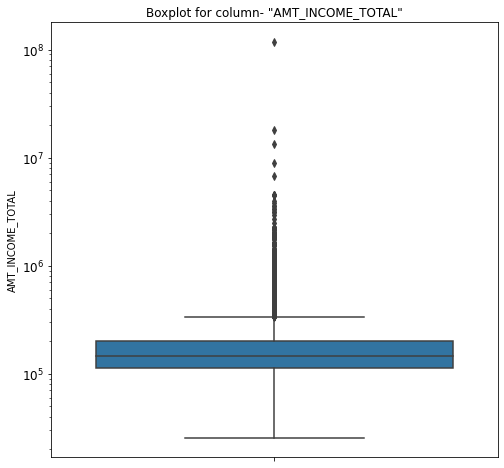

In [0]:
plt.figure(figsize=(8,8))
sns.boxplot(y=application_data['AMT_INCOME_TOTAL'])
plt.yscale('log')
plt.ylabel('AMT_INCOME_TOTAL')
plt.yticks(fontsize=12)
plt.title('Boxplot for column- "AMT_INCOME_TOTAL"')
plt.show()



> The above Boxplot clearly shows there're many outliers










We can also find the outliers my using mean() and median():

In [0]:
print('Mean()  =', application_data['AMT_INCOME_TOTAL'].mean())
print('Median()=', application_data['AMT_INCOME_TOTAL'].median())

Mean()  = 168797.9192969845
Median()= 147150.0


In [0]:
print('Total Outliers = ',len(application_data[application_data['AMT_INCOME_TOTAL']>=application_data['AMT_INCOME_TOTAL'].mean()+2*application_data['AMT_INCOME_TOTAL'].std()])+len(application_data[application_data['AMT_INCOME_TOTAL']<=application_data['AMT_INCOME_TOTAL'].mean()-2*application_data['AMT_INCOME_TOTAL'].std()]))

Total Outliers =  1438


##Understanding-

######Total Outlier points =  1438. The column-"**AMT_INCOME_TOTAL**" refers to the salary of the loan applicants and there could be situation when an applicant is earning less salary (15K-30K per month). On the other hand, another applicant could be earning a higher salary (80K-140K per month). Thus in this case, the applicant with high salary is the outlier. This outlier could justify the presence of 1438 data points in our plot.


In [0]:
#Treating the outlier-

application_data['AMT_INCOME_TOTAL_LOG'] = np.log(application_data['AMT_INCOME_TOTAL'])
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,WORK_EXP,AMT_INCOME_TOTAL_LOG
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.218495
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.506177
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.119883
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,11.813030
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55.0,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.707670


In [0]:
# Printing the mean() and median() for the new/ created column-

print('Mean()   = ', application_data['AMT_INCOME_TOTAL_LOG'].mean())
print('Median() = ', application_data['AMT_INCOME_TOTAL_LOG'].median())

Mean()   =  11.909237775371254
Median() =  11.899207753661619


###### The very small-difference between the mean() and median() shows the outlier is now treated.

#### 2. AMT_CREDIT

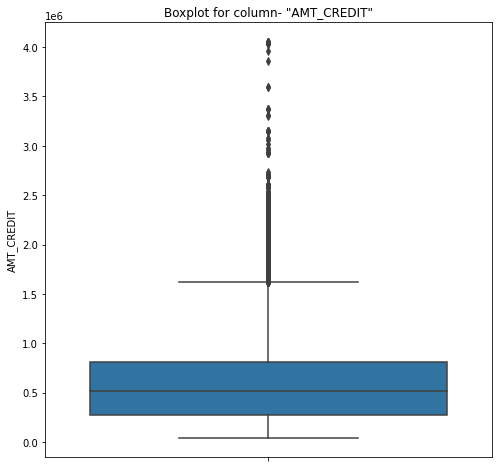

In [0]:

plt.figure(figsize=(8,8))
sns.boxplot(y=application_data['AMT_CREDIT'])
plt.ylabel('AMT_CREDIT')
plt.title('Boxplot for column- "AMT_CREDIT"')
plt.show()

#### The above Boxplot clearly shows there're many outliers

In [0]:
# printing the mean() and median()-

print('Mean()  =', application_data['AMT_CREDIT'].mean())
print('Median()=', application_data['AMT_CREDIT'].median())


Mean()  = 599025.9997057016
Median()= 513531.0


In [0]:
print('Total Outliers = ',len(application_data[application_data['AMT_CREDIT']>=application_data['AMT_CREDIT'].mean()+2*application_data['AMT_CREDIT'].std()])+len(application_data[application_data['AMT_CREDIT']<=application_data['AMT_CREDIT'].mean()-2*application_data['AMT_CREDIT'].std()]))

Total Outliers =  12999


#Understanding-

######Total Outlier points =  12999. The column-"**AMT_CREDIT**" refers to the 'loan amount'. The loan amount may range to any values and applicants can avail it for any reason.  In addition, there could be other factors that may play a role in this amount. Ex: ROI charged, CIBIL score, applicant's income and assets owned by him/ her all add up to his final discharged loan amount . These factors vary from applicant-to-applicant just as in our case.

In [0]:
# Treating outliers using LOG, just like the 1st case.

application_data['AMT_CREDIT_LOG'] = np.log(application_data['AMT_CREDIT'])
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,WORK_EXP,AMT_INCOME_TOTAL_LOG,AMT_CREDIT_LOG
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.218495,12.915579
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.506177,14.072864
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.119883,11.813030
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,11.813030,12.652944
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55.0,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.707670,13.148031


In [0]:
# Printing the mean() and median() for the new/ created column-

print('Mean()   = ', application_data['AMT_CREDIT_LOG'].mean())
print('Median() = ', application_data['AMT_CREDIT_LOG'].median())

Mean()   =  13.070105291901916
Median() =  13.14906567653829


###### The small-difference between the mean() and median() shows the outlier is now treated.

###3. DAYS_EMPLOYED

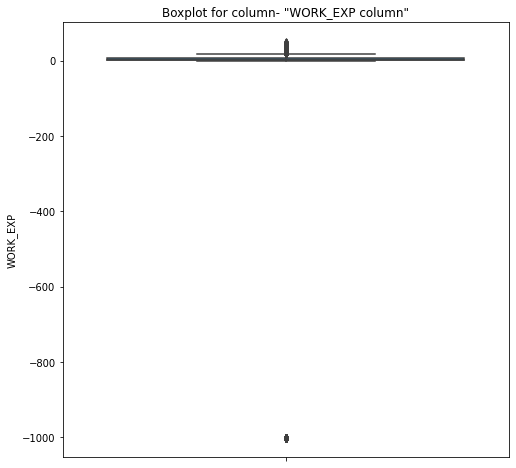

In [0]:
# Using BoxPlot to show the outliers-

plt.figure(figsize=(8,8))
sns.boxplot(y=application_data['WORK_EXP'])
plt.ylabel('WORK_EXP')
plt.title('Boxplot for column- "WORK_EXP column"')
plt.show()

##### A high value of outlier can be seen above.

In [0]:
# printing the mean() and median()-

print('Mean()  =', application_data['WORK_EXP'].mean())
print('Median()=', application_data['WORK_EXP'].median())

Mean()  = -174.89533707737283
Median()= 3.0


In [0]:
print('Total Outliers()= ',len(application_data[application_data['WORK_EXP']>=application_data['WORK_EXP'].mean()+2*application_data['WORK_EXP'].std()])+len(application_data[application_data['WORK_EXP']<=application_data['WORK_EXP'].mean()-2*application_data['WORK_EXP'].std()]))

Total Outliers()=  55374


##Understanding-

##### As seen, the mean() gives a negative value which means some of the data in the dataframe has a negative work experience which is practically impossible. These records need to be deleted.

In [0]:
# Removing the negative values-

application_data = application_data[(application_data['WORK_EXP']<application_data['WORK_EXP'].mean()+2*application_data['WORK_EXP'].std()) & (application_data['WORK_EXP']>application_data['WORK_EXP'].mean()-2*application_data['WORK_EXP'].std())]
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,WORK_EXP,AMT_INCOME_TOTAL_LOG,AMT_CREDIT_LOG
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.218495,12.915579
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.506177,14.072864
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.119883,11.813030
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,11.813030,12.652944
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55.0,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.707670,13.148031


In [0]:
# printing the mean() and median() after removing the negative values-

print('Mean()  =', application_data['WORK_EXP'].mean())
print('Median()=', application_data['WORK_EXP'].median())

Mean()  = 6.5326945271816514
Median()= 5.0


## **Task 3.6** Binning of continuous variables. 

In [0]:
#Binning Income into few categories-


def income(i):
    if(i> 0 and i <=20000):
        return 'Less Income'
    elif(i>=20001 and i<=55000):
        return 'Avg. Income'
    else:
        return 'High Income'
    
    
application_data['INCOME_CATEGORY'] = application_data['AMT_INCOME_TOTAL'].apply(lambda x: income(x))


In [0]:
application_data['INCOME_CATEGORY'].head(10)

0     High Income
1     High Income
2     High Income
3     High Income
4     High Income
5     High Income
6     High Income
7     High Income
9     High Income
10    High Income
Name: INCOME_CATEGORY, dtype: object

In [0]:
# Finding the percentage of each category in the newly created column- "INCOME_CATEGORY"

application_data['INCOME_CATEGORY'].value_counts(normalize= True)

High Income    0.986916
Avg. Income    0.013084
Name: INCOME_CATEGORY, dtype: float64

In [0]:
# Viewing the dataframe after column addition

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,WORK_EXP,AMT_INCOME_TOTAL_LOG,AMT_CREDIT_LOG,INCOME_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.218495,12.915579,High Income
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.506177,14.072864,High Income
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.119883,11.813030,High Income
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,11.813030,12.652944,High Income
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55.0,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.707670,13.148031,High Income


# **Task 4.** Analysis

#### **Task 4.1** Imbalance Percentage

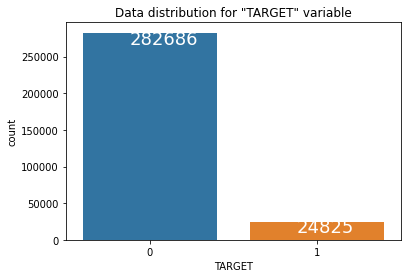

In [8]:
ax1 = sns.countplot(application_data['TARGET'])

plt.title('Data distribution for "TARGET" variable')
for i in ax1.patches:
    ax1.text(i.get_x()+.28, i.get_height()-15000, str(round(i.get_height(), 1)), fontsize=18, color='white')
plt.show()


#### **Task 4.2** Divide the data into two sets, i.e. Target=1 and Target=0.

In [0]:
# Dividing the dataframe into two sets

Target0 = application_data[application_data['TARGET'] == '0']
Target1 = application_data[application_data['TARGET'] == '1']

In [0]:
# Checking the shape of both these dataframes

print('Shape of Target0: ',Target0.shape)
print('Shape of Target1: ',Target1.shape)

Shape of Target0:  (230302, 85)
Shape of Target1:  (21835, 85)


### **Task 4.3** Univariate Analysis of Categorical Variables for TARGET0 

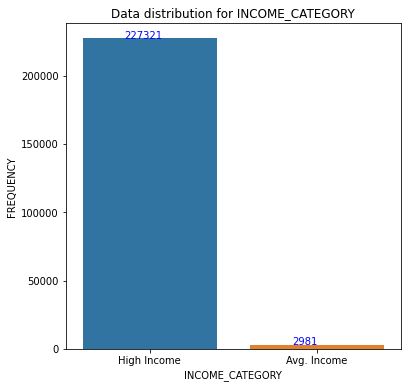

In [0]:
# 1. Analyzing INCOME_CATEGORY-

plt.figure(figsize=(6,6))
ax2 = sns.countplot(Target0['INCOME_CATEGORY'])
plt.ylabel('FREQUENCY')
plt.xlabel('INCOME_CATEGORY')

plt.title('Data distribution for INCOME_CATEGORY')
for i in ax2.patches:
    ax2.text(i.get_x()+.25, i.get_height(), str(round(i.get_height(), 2)), color='blue')
    
plt.show()  

### Understanding-
#### Applicants with High Income outnumber the applicants with Avg. Income. This could be because High Income applicants decide to avail loan for various things as they can afford to repay it unlike Avg. Income applicants.

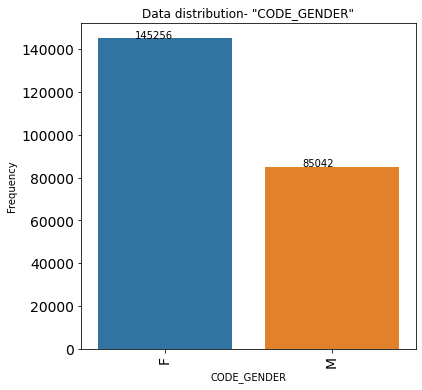

In [0]:
# 2. Analysing Gender-

plt.figure(figsize=(6,6))
ax5 = sns.countplot(Target0[Target0['CODE_GENDER'] != 'XNA']['CODE_GENDER'])
plt.ylabel('Frequency')
plt.xlabel('CODE_GENDER')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.title('Data distribution- "CODE_GENDER"')
for i in ax5.patches:
    ax5.text(i.get_x()+.22, i.get_height(), str(round(i.get_height(), 2)), color='black')
    
plt.show()

### Understanding-
#### Female applicants are quite higher in number of applicants. This could be due to Government may have started several schemes, subsidized the ROI where Women can benefit better than Men. This may also lead to cases where Woman in a family would apply for a loan instead of Man from her family thus increasing the count.

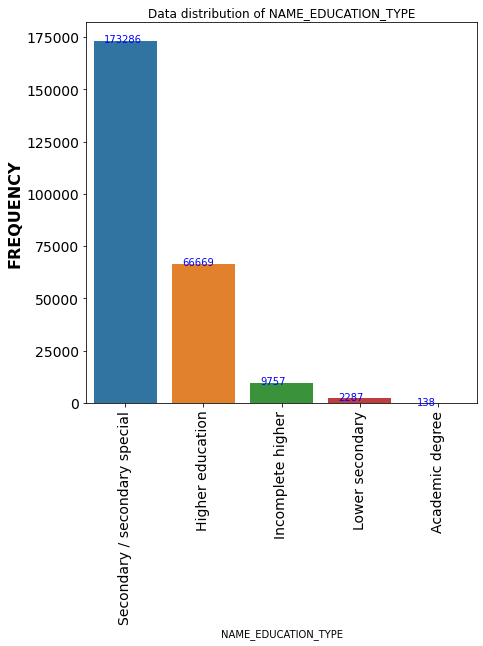

In [0]:
# Analysing EducationType

plt.figure(figsize=(7,7))
ax4 = sns.countplot(application_data['NAME_EDUCATION_TYPE'])
plt.ylabel('FREQUENCY', fontweight='bold', fontsize=16)
plt.xlabel('NAME_EDUCATION_TYPE')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.title('Data distribution of NAME_EDUCATION_TYPE')
for i in ax4.patches:
    ax4.text(i.get_x()+.13, i.get_height()-1000, str(round(i.get_height(), 2)), color='blue')
    
plt.show()

### Understanding -
#### As observed, the number of 'Secondary/Secondary' special type educated applicants is high. This could be because these people would applying loans for Higher education in Foreign Universities, where the fees is higher. 

##Univariate Analysis Categorical Variables for TARGET1

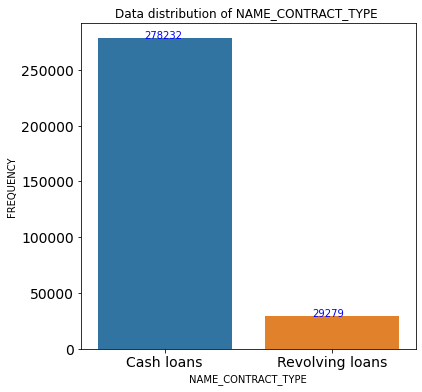

In [9]:
# 1. Analysing NAME_CONTRACT_TYPE-

plt.figure(figsize=(6,6))
ax9 = sns.countplot(application_data['NAME_CONTRACT_TYPE'])
plt.ylabel('FREQUENCY')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Data distribution of NAME_CONTRACT_TYPE ')
for i in ax9.patches:
    ax9.text(i.get_x()+.28, i.get_height(), str(round(i.get_height(), 2)),color='blue')
    
plt.show()

### Understanding -
#### As observed, the number of applicants are high in Cash loans as compared to the Revolving loans. We can see that in our case of cash loans, client is facing payment difficulties since it is mandatory to pay the monthly instalment for all the months. Contrarily, in case of Revolving loans client can opt for paying the entire amount at the end when the credit limit is exhausted.

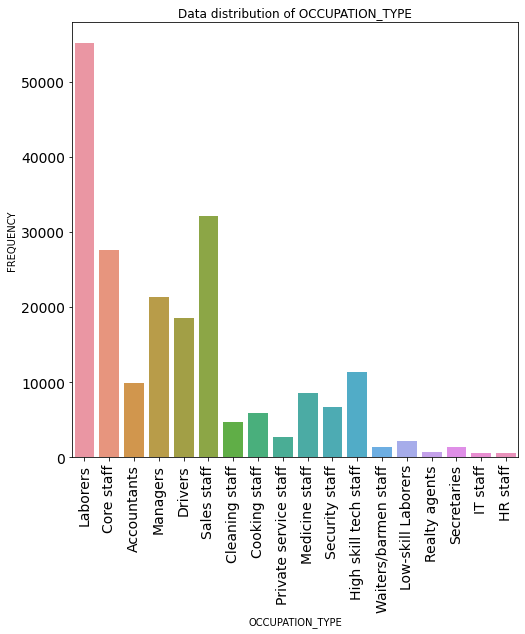

In [0]:
# 2. Analysing Occupation_Type

plt.figure(figsize=(8,8))
ax11 = sns.countplot(application_data['OCCUPATION_TYPE'])
plt.ylabel('FREQUENCY')
plt.xlabel('OCCUPATION_TYPE')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.title('Data distribution of OCCUPATION_TYPE')
plt.show()

### Understanding -
#### As observed, Labourers are unable to pay back their loan and are the ones whose Defaulting rates are higher than any other category. Clearly, as known Labourers dont earn enough money to run a family and re pay their loan.

# Correlation  matrix for Target1 and Target0 dataframe

In [0]:
corr0 = Target0.drop(['DAYS_BIRTH', 'WORK_EXP','AMT_INCOME_TOTAL_LOG', 'AMT_CREDIT_LOG', 'INCOME_CATEGORY','YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE'],
                     axis=1).corr()

In [0]:
corr1 = application_data.drop(['DAYS_BIRTH', 'WORK_EXP',
       'AMT_INCOME_TOTAL_LOG', 'AMT_CREDIT_LOG', 'INCOME_CATEGORY'
       ,'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE'], axis=1).corr()

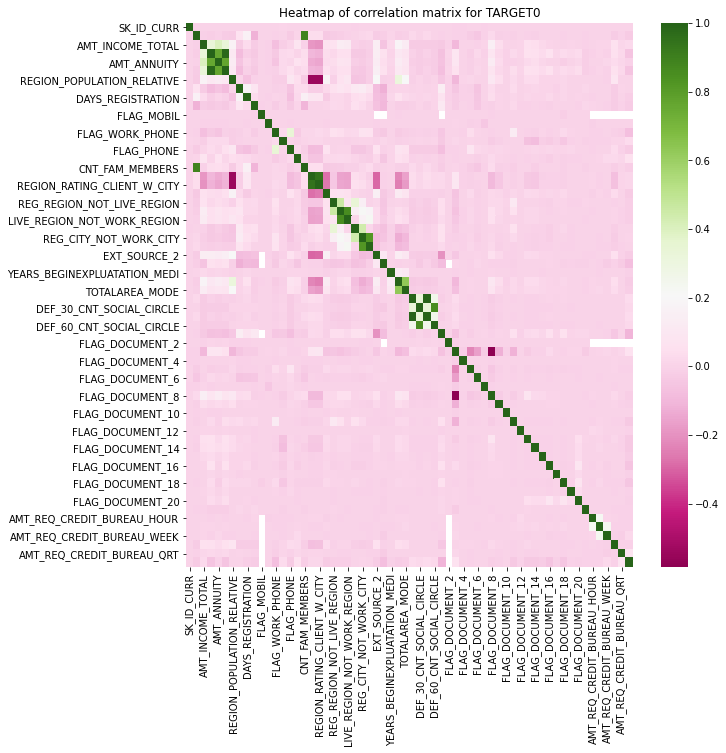

In [0]:
# Heatmap for Target0

plt.figure(figsize=(10,10))
sns.heatmap(corr0,cmap="PiYG")
plt.title('Heatmap of correlation matrix for TARGET0')
plt.show()

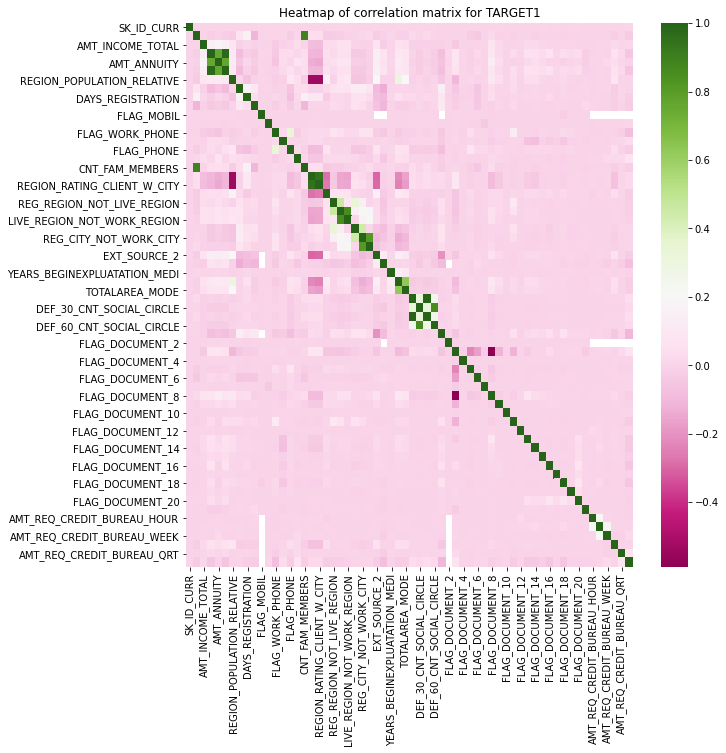

In [0]:
# Heatmap for Target1

plt.figure(figsize=(10,10))
sns.heatmap(corr1,cmap="PiYG")
plt.title('Heatmap of correlation matrix for TARGET1')
plt.show()

#### Printing top 10 correlation for Target0 and Target1

In [0]:
#### 
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

#Below function retunrns the top 10 correlations
def get_top_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [0]:
# Top 10 for Corr0

print('Top 10 correlations for TARGET0 :')
print(get_top_correlations(corr0))

Top 10 correlations for TARGET0 :
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.999996
AMT_CREDIT                  AMT_GOODS_PRICE                0.999531
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.998449
CNT_CHILDREN                CNT_FAM_MEMBERS                0.990472
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.986857
AMT_ANNUITY                 AMT_GOODS_PRICE                0.962457
AMT_CREDIT                  AMT_ANNUITY                    0.962122
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.948453
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.924001
FLOORSMAX_MEDI              TOTALAREA_MODE                 0.905352
dtype: float64


In [0]:
# Top 10 for Corr1

print('Top 10 correlations for TARGET1 :')
print(get_top_correlations(corr1))

Top 10 correlations for TARGET1 :
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.999996
AMT_CREDIT                  AMT_GOODS_PRICE                0.999501
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.998499
CNT_CHILDREN                CNT_FAM_MEMBERS                0.990470
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.987017
AMT_ANNUITY                 AMT_GOODS_PRICE                0.962166
AMT_CREDIT                  AMT_ANNUITY                    0.962146
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.946711
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.920617
FLOORSMAX_MEDI              TOTALAREA_MODE                 0.905549
dtype: float64


Both the Correlations are not same. There are few differences between them. Ex columns.


# **Task 5:** Read “Previous Application” data

In [0]:
# Creating a new link

link2 = "https://drive.google.com/open?id=1NHpaDcqzvV0qm6new4IEhS9U_qxDag6G"
fluff, id = link2.split('=')
print (id) # Verify that you have everything after '='

1NHpaDcqzvV0qm6new4IEhS9U_qxDag6G


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('previous_application.csv')  
previous_application = pd.read_csv('previous_application.csv')
print("Read successful...")

Read successful...


In [0]:
application_data.shape

(252137, 85)

In [0]:
previous_application.shape

(1670214, 37)

In [0]:
# Merging the frames together

merged_data = application_data.merge(previous_application,how = 'right',on = 'SK_ID_CURR',suffixes= ('_LEFT','_RIGHT'))
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_LEFT,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_LEFT,AMT_ANNUITY_LEFT,AMT_GOODS_PRICE_LEFT,NAME_TYPE_SUITE_LEFT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_LEFT,HOUR_APPR_PROCESS_START_LEFT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,WORK_EXP,AMT_INCOME_TOTAL_LOG,AMT_CREDIT_LOG,INCOME_CATEGORY,SK_ID_PREV,NAME_CONTRACT_TYPE_RIGHT,AMT_ANNUITY_RIGHT,AMT_APPLICATION,AMT_CREDIT_RIGHT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_RIGHT,WEEKDAY_APPR_PROCESS_START_RIGHT,HOUR_APPR_PROCESS_START_RIGHT,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_RIGHT,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,-637.0,-3648.0,-2120.0,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.218495,12.915579,High Income,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,-1188.0,-1186.0,-291.0,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.506177,14.072864,High Income,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,-1188

In [0]:
# Finding the shape of the Merged dataframe

merged_data.shape

(1670214, 121)

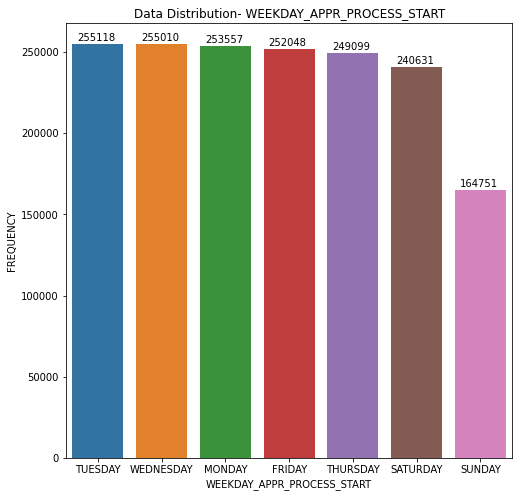

In [0]:
# Univariate Analysis on WEEKDAY_APPR_PROCESS_START


plt.figure(figsize = (8,8))
ax2 = sns.countplot(previous_application['WEEKDAY_APPR_PROCESS_START'], order=previous_application['WEEKDAY_APPR_PROCESS_START'].value_counts().index)
plt.ylabel("FREQUENCY")
plt.xlabel("WEEKDAY_APPR_PROCESS_START")
plt.title("Data Distribution- WEEKDAY_APPR_PROCESS_START")
for i in ax2.patches:
    ax2.text(i.get_x()+0.08, i.get_height()+2000, str(round(i.get_height(), 2)) ,color='black')
plt.show()

###Understanding-
##### As observed, Number of loan applicants are higher on the first three days of the week i.e. Tuesday, Wednesday and Monday. This shows that applicants like to prefer to Bank on the first three days so their applicantions can pass within the same week and they can have their cash by the weekend. Also, Sundays have the lowest number of applicants. These applicants are the ones who have submitted their appplications online or via agent.

## Bivariate Analysis
#### AMT_APPLICATION vs AMT_GOODS_PRICE

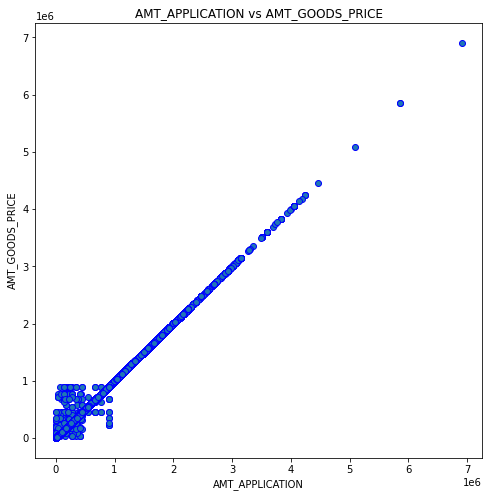

In [0]:
plt.figure(figsize=(8,8))

plt.xlabel('AMT_APPLICATION')
plt.ylabel('AMT_GOODS_PRICE')
plt.title('AMT_APPLICATION vs AMT_GOODS_PRICE')
plt.scatter(previous_application['AMT_APPLICATION'], previous_application['AMT_GOODS_PRICE'], edgecolors='blue')
plt.show()

## Understanding-
#### As observed, this shows a  strong relationship between AMT_APPLICATION and AMT_GOODS_PRICE. AMT_APPLICATION means loan amount applied by client and AMT_GOODS_PRICE specifies the price of entity for which client is applying for loan. Hence, if client wants to purchase expensive commodity then  client will apply for same amount of loan as price of commodity. This is the reason for direct relationship between variables.